In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit
import tree_braider2 as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
# r1 = {}

# r1['feature'] = '0'
# r1['split'] = 1
# r1['features'] = ['1']
# r1['samples'] = ['0','1','2']
# r1['medians'] = [0]
# r1['dispersions'] = [0]
# r1['local_gains'] = None
# r1['absolute_gains'] = None
# r1['children'] = []


In [3]:
# c1 = {}

# c1['feature'] = '0'
# c1['split'] = 1
# c1['features']= ['1']
# c1['samples'] = ['1','2']
# c1['medians'] = [0]
# c1['dispersions'] = [0]
# c1['local_gains'] = None
# c1['absolute_gains'] = None
# c1['children'] = []

# c2 = {}

# c2['feature'] = '0'
# c2['split'] = 1
# c2['features']= ['1']
# c2['samples'] = ['0']
# c2['medians'] = [0]
# c2['dispersions'] = [0]
# c2['local_gains'] = None
# c2['absolute_gains'] = None
# c2['children'] = []


# r1['children'] = [c1,c2]


In [4]:
# test_counts = np.array([[1],[2],[3]])

# test_forest = trr.Forest([r1],test_counts)

In [5]:
# test_forest.nodes()

In [6]:
# test_forest.truth_dictionary.sample_dictionary

In [7]:
# test_forest.nodes()[2].index

In [8]:
# test_forest.nodes()[2].lr_encoding_vectors()

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9
['input.counts', 'tmp.ifh', 'output.counts', 'tmp.ofh']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp.ifh -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp.ofh -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp.ifh
R

Tree Pool: Sending 67
Tree Pool: Request for tree: 68
Tree Pool: Deriving 68
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp.67.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 68
SSME
Unwrapping tree
Tree Pool: Sending 68
Tree Pool: Request for tree: 69
Tree Pool: Deriving 69
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp.68.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 69
SSME
Unwrapping tree
Tree Pool: Sending 69
Tree Pool: Request for tree: 70
Tree Pool: Deriving 70
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdo1muxv9/tmp.69.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 70
SSME
Unwrapping tree
Tree Pool: Sending 70
Tree Pool: Request for tree: 71
Tree Pool: Deriving 71
Deriving from prototype: 100,4,4
Seria

In [11]:
iris_forest.nodes()[0].samples

['9',
 '37',
 '12',
 '48',
 '3',
 '47',
 '20',
 '38',
 '4',
 '28',
 '29',
 '10',
 '10',
 '35',
 '19',
 '19',
 '6',
 '17',
 '17',
 '40',
 '44']

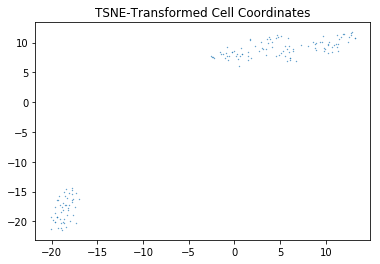

In [12]:
iftc = iris_forest.tsne()

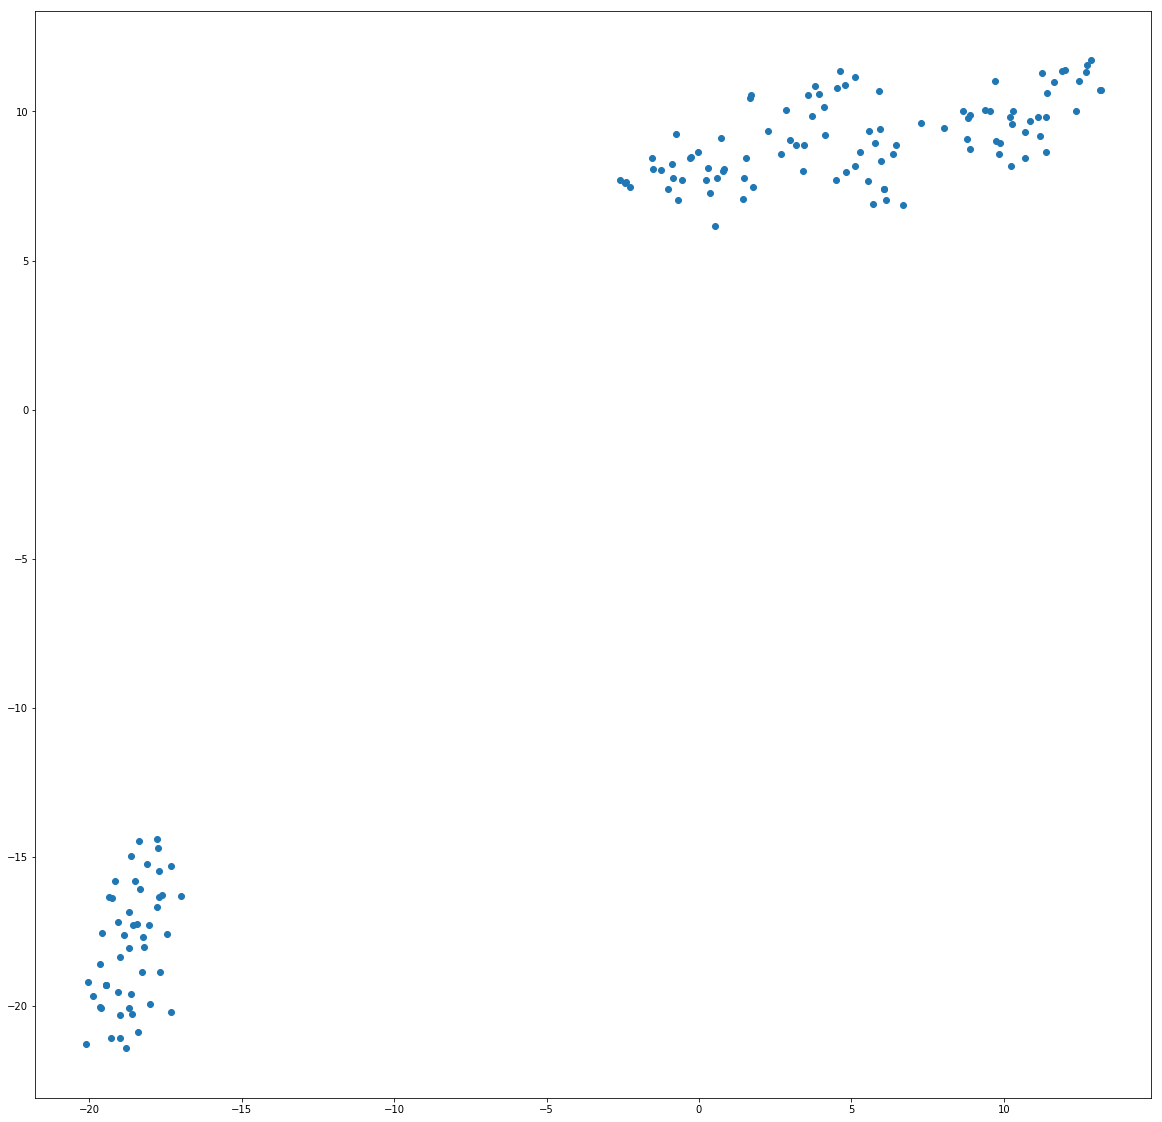

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest,beta=1,gamma=1,alpha_e=10,beta_e=10,start_states=10,p=1,inf_check=False)

In [15]:
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)

In [16]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)
# print(braids.hidden_states[4].node_odds())

In [17]:
# [n.hidden_state for n in braids.nodes]

In [18]:
for i in range(20):
    print("+++++++++++++++++")
    print("ALPHA")
    print(braids.alpha)
    print("BETA")
    print(braids.beta)
    print("GAMMA")
    print(braids.gamma)
    print("+++++++++++++++++")
    braids.sweep()
#     braids.subsample_sweep()

# for hidden_state in range(braids.hidden_states):
#     print(np.sum(braids.state_masks[hidden_state]))
#     plt.figure(figsize=(20,20))
# #     plt.title(str(hidden_state.index))
#     plt.scatter(iftc[:,0],iftc[:,1],c=braids.lr_finite(hidden_state),cmap='bwr')
#     plt.show()
#     plt.figure()
#     plt.hist(hidden_state.node_odds())
#     plt.show()
    
# plt.figure()
# plt.imshow(braids.transition_counts,cmap='binary')
# plt.show()
    

+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
10
[0 0 0 0 8 4 6 0 0 0 0 8 9 6 0 0 0 0 6 2 9 0 0 0 0 5 7 2 0 0 0 0 5 4 6 0 0
 0 0 2 9 7 0 0 0 0 9 8 4 0 0 0 0 3 2 4 0 0 0 0 9 5 2 0 0 0 0 3 4 5 0 0 0 0
 6 3 9 0 0 0 0 5 6 9 0 0 0 0 9 1 4 0 0 0 0 1 5 4 0 0 0 0 4 7 2 0 0 0 0 8 8
 3 0 0 0 0 4 5 5 0 0 0 0 5 2 2 0 0 0 0 8 3 6 0 0 0 0 9 1 1 0 0 0 0 3 1 1 0
 0 0 0 7 3 5 0 0 0 0 6 5 3 0 0 0 0 4 1 6 0 0 0 0 6 8 4 0 0 0 0 9 1 4 0 0 0
 0 6 2 9 0 0 0 0 6 2 3 0 0 0 0 6 6 9 0 0 0 0 2 7 3 0 0 0 0 3 6 4 0 0 0 0 8
 8 7 0 0 0 0 2 1 2 0 0 0 0 5 4 3 0 0 0 0 2 2 8 0 0 0 0 1 9 3 0 0 0 0 3 2 3
 0 0 0 0 1 3 9 0 0 0 0 6 7 9 0 0 0 0 8 2 1 0 0 0 0 3 5 4 0 0 0 0 2 9 5 0 0
 0 0 5 6 1 0 0 0 0 3 2 7 0 0 0 0 6 2 8 0 0 0 0 3 4 4 0 0 0 0 5 1 4 0 0 0 0
 1 9 1 0 0 0 0 9 3 4 0 0 0 0 2 8 9 0 0 0 0 6 2 4 0 0 0 0 9 3 9 0 0 0 0 1 6
 6 0 0 0 0 7 7 6 0 0 0 0 7 7 7 0 0 0 0 3 6 9 0 0 0 0 1 9 5 0 0 0 0 3 3 2 0
 0 0 0 7 5 5 0 0 0 0 2 7 9 0 0 0 0 9 6 1 0 0 0 0 2 6 4 0 0 0 0 4 9 8 0 0 0
 0 8 6 9 0 0 0 0 8 2 8 0 0 0 0 3 8 9 0

Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 

Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0

Beta:1
Gamma:2
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0

Beta:1
Gamma:2
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0

In [19]:
# braids.state_log_odds[:,3:4]
braids.state_log_odds_given_divergence[:,3:5]
# braids.state_log_odds_given_child_l[:,3:5]

array([[ 0.        ,  0.        ],
       [ 0.        , 10.58898275],
       [ 0.        , 14.2850532 ],
       [ 0.        ,  8.68250635]])

In [20]:
braids.backup('./test.remove_later')

In [21]:
braids = trbr.IHMM.reconstitute('./test.remove_later')

Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/boris/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/boris/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/boris/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/boris/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/boris/miniconda3/lib/python3.7/multiproce

In [22]:
ni = 20
print(braids.live_mask[20])
print(braids.state_log_odds[:,20])
print(braids.state_log_odds_given_divergence[:,20])
print(braids.state_log_odds_given_child_l[:,20])
print(braids.state_log_odds_given_child_r[:,20])

True
[-20.91681323  -7.51114808  69.50376496  -3.73308691]
[ 0.         10.96088031 56.23046763 13.04294766]
[-10.45840661  -9.23601419   6.63664867  -8.38801729]
[-10.45840661  -9.23601419   6.63664867  -8.38801729]


In [23]:
# braids.child_state_l[braids.live_mask]

In [24]:
# plt.figure()
# plt.imshow(braids.recompute_state_masks(braids.node_states)[:,braids.live_mask],cmap='binary',aspect='auto')
# plt.show()

In [25]:
# plt.figure()
# plt.imshow(braids.most_likely_parent_to_child(),cmap='binary')
# plt.show()
# braids.state_masks.shape

# for i in range(300):
#     braids.sweep()

# for i in range(300):
#     braids.sample_states()

# plt.figure()
# plt.imshow(sweep,aspect='auto')
# plt.show()

# print(str(list(sweep)))
# print(sweep.shape)

In [26]:
braids.state_log_odds

array([[-22.9096267 , -22.9096267 , -22.9096267 , ..., -22.9096267 ,
        -22.9096267 , -20.91681323],
       [ 15.28772437,  15.28772437,  15.28772437, ...,  29.36918072,
         37.94569908,  -5.72447549],
       [-20.46484185, -20.46484185, -20.46484185, ...,  -7.66344004,
        -13.55790555,  68.93822715],
       [-18.76884804, -18.76884804, -18.76884804, ..., -13.78090161,
         -6.86204125,  -7.47300796]])

In [27]:
# braids.node_states[braids.live_mask]
# braids.sweep()

/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:1134: RuntimeWarning: divide by zero encountered in true_divide
  return expit(np.log2(self.state_raw_emission_counts[state][:,0]/self.state_raw_emission_counts[state][:,1]))
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:1134: RuntimeWarning: divide by zero encountered in log2
  return expit(np.log2(self.state_raw_emission_counts[state][:,0]/self.state_raw_emission_counts[state][:,1]))


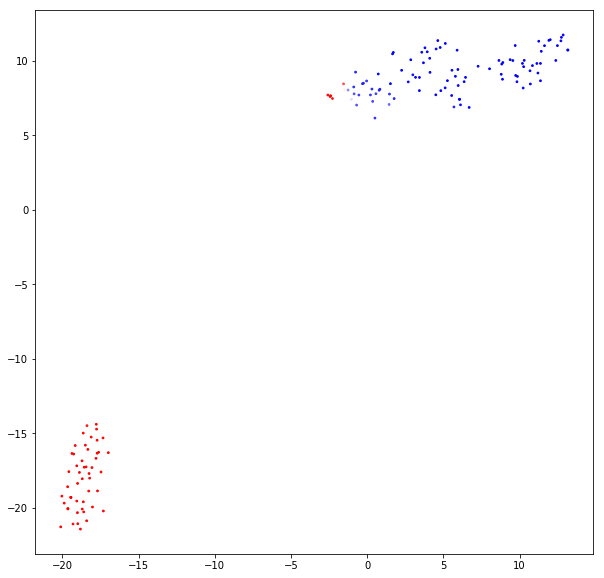

In [28]:
# braids.lr_finite(2)
plt.figure(figsize=(10,10))
plt.scatter(iftc[:,0],iftc[:,1],s=3,c=braids.lr_finite(2),cmap='bwr')
plt.show()

# plt.figure(figsize=(10,10))
# plt.scatter(iftc[:,0],iftc[:,1],s=3,c=braids.hidden_states[3].lr_finite(),cmap/='bwr')
# plt.show()


In [29]:
braids.most_likely_parent_to_child()

Recomputing Transition Counts
3
[0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
braids.max_likelihood_sweep()

In [ ]:
def likelihood_gamma(k,tt,max_gamma=None,prior=True):

    if max_gamma is None:

        max_gamma = tt + 1

    log_sequence = np.log2(np.arange(1,max_gamma*2))

    if prior:
        l2l = lambda g: ((k * np.log2(g)) - (np.sum(log_sequence[g+1:tt+g+1]) + (np.log2(g))))
    else:     
        l2l = lambda g: ((k * np.log2(g)) - (np.sum(log_sequence[g+1:tt+g+1])))

    likelihood_sequence = np.array([l2l(g) for g in range(1,max_gamma)])
    
    if np.argmax(likelihood_sequence) + 1 == len(likelihood_sequence) and max_gamma < 10000:
        likelihood_gamma(k,tt, max_gamma = max_gamma * 5)
        return None
    else:
        print(np.argmax(likelihood_sequence)+1)
        plt.figure()
        plt.plot(np.arange(len(likelihood_sequence)),likelihood_sequence)
        plt.xlim(0,100)
        plt.show()

In [ ]:
likelihood_gamma(100,12500,prior=True)
likelihood_gamma(100,12500,prior=False)

likelihood_gamma(100,100,prior=True)
likelihood_gamma(100,100,prior=False)

likelihood_gamma(10,10,prior=True)
likelihood_gamma(10,10,prior=False)


likelihood_gamma(2,2,prior=True)
likelihood_gamma(2,2,prior=False)

In [ ]:
    def recompute_beta(transition_counts,max_beta=None,prior=True):

        if max_beta is None:
            
            max_beta = int(np.max(np.sum(transition_counts,axis=0)) * 2)

        log_sequence = np.log2(np.arange(1,max_beta*2))

        likelihood_sequence = np.zeros(max_beta)[1:]

        for i,transitions in enumerate(transition_counts):
            total = int(np.sum(transitions))
            non_zero = int(np.sum(transitions > 0))
            l2ls = lambda b: (((non_zero - 1) * np.log2(b)) - np.sum(log_sequence[b:total+b]))
            likelihood_sequence += np.array([l2ls(b) for b in range(1,max_beta)])
        
        if prior:
            likelihood_sequence -= log_sequence[:len(likelihood_sequence)]
                
        if np.argmax(likelihood_sequence) + 1 == len(likelihood_sequence) and max_beta < 10000:
            likelihood_gamma(k,tt, max_beta = max_beta * 5)
            return None
        else:
            print(np.argmax(likelihood_sequence) + 1)
            plt.figure()
            plt.plot(np.arange(len(likelihood_sequence)),likelihood_sequence)
            plt.xlim(0,100)
            plt.show()
        

In [ ]:
diffuse_transitions = np.ones((50,50)) * 5
checkered_transitions = diffuse_transitions.copy()
checkered_transitions[np.random.random(checkered_transitions.shape) > 0.9] = 0

concentrated_transitions = np.ones((5,5)) * 500

limit_transitions = np.ones((1,1)) * 12500

halo = diffuse_transitions.copy()
halo[:2] = 100

recompute_beta(diffuse_transitions,prior=True)
recompute_beta(diffuse_transitions,prior=False)

recompute_beta(concentrated_transitions,prior=True)
recompute_beta(concentrated_transitions,prior=False)

recompute_beta(limit_transitions,prior=True)
recompute_beta(limit_transitions,prior=False)

recompute_beta(checkered_transitions,prior=True)
recompute_beta(checkered_transitions,prior=False)

recompute_beta(halo,prior=True)
recompute_beta(halo,prior=False)

